# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Abdul ROhman
- **Email:** abdulrohman970@gmail.com]
- **ID Dicoding:** abdulrohman1453

## Menentukan Pertanyaan Bisnis

- Product Apa yang paling laris di  Olist Store?
- agaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import folium

## Data Wrangling

### Gathering Data

####order Item

In [3]:
df_order_items = pd.read_csv('/content/drive/MyDrive/Data Science/Dicoding/Project/order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Orders

In [4]:
df_orders = pd.read_csv('/content/drive/MyDrive/Data Science/Dicoding/Project/orders_dataset.csv')
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Customers

In [6]:
df_customers = pd.read_csv('/content/drive/MyDrive/Data Science/Dicoding/Project/customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Products

In [7]:
df_products = pd.read_csv('/content/drive/MyDrive/Data Science/Dicoding/Project/products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Product Category Name Translation

In [8]:
df_category_translation = pd.read_csv('/content/drive/MyDrive/Data Science/Dicoding/Project/product_category_name_translation.csv')
df_category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


####Geolocation

In [9]:
geo = pd.read_csv('/content/drive/MyDrive/Data Science/Dicoding/Project/geolocation_dataset.csv', dtype={'geolocation_zip_code_prefix': str})

geo.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
2,01046,-23.546129,-46.642951,sao paulo,SP


In [10]:
geo['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

,geolocation_zip_code_prefix
count,19015.000000
mean,52.598633
std,72.057907
min,1.000000
25%,10.000000
50%,29.000000
75%,66.500000
max,1146.000000


### Assessing Data

####Order Items

In [11]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
print(df_order_items.isnull().sum())
print("""\n""")
print("Jumlah Data Duplikat:", df_order_items.duplicated().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Jumlah Data Duplikat: 0


#### Orders

In [13]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**untuk format tanggalnya harus kita ubah**

In [14]:
print(df_orders.isnull().sum())
print("""\n""")
print("Jumlah Data Duplikat:", df_orders.duplicated().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


Jumlah Data Duplikat: 0


**pada data orders ada data yang hilang**

#### Customers

In [15]:
print(df_customers.isnull().sum())
print("""\n""")
print("Jumlah Data Duplikat:", df_products.duplicated().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Jumlah Data Duplikat: 0


####Products

In [16]:
print(df_products.isnull().sum())
print("""\n""")
print("Jumlah Data Duplikat:", df_products.duplicated().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


Jumlah Data Duplikat: 0


**ada data products pada hilang**

#### Product Category Name Translation

In [17]:
df_category_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### Cleaning Data

#### Order Items

In [18]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### Total price

In [19]:
# Menghitung Total harga
df_total_price = df_order_items.groupby('order_id').sum()
df_total_price['total_price'] = round(df_total_price['price'] + df_total_price['freight_value'],2)
df_total_price.head(5)

<ipython-input-19-9e7241836f46>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_total_price = df_order_items.groupby('order_id').sum()


,order_item_id,price,freight_value,total_price
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,72.19
00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,259.83
000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,216.87
00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,218.04


In [59]:
df_total_price.to_csv('df_total_price', index=False)

#### Orders

In [20]:
# Membenarkan format tanggal di orders
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [21]:
# menghapus data yang missing value
df_orders.dropna(inplace = True)
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [22]:
# melihat status order
df_orders.order_status.value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

rupanya ada status order yang cancel (batal), maka kita akan hapus data cencel ini

In [23]:
df_orders = df_orders.query("order_status=='delivered'")
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [24]:
df_orders.order_status.value_counts()

delivered    96455
Name: order_status, dtype: int64

#### Products

In [25]:
# Mengisi missing value pada products dengan modus dan median
df_products['product_category_name'].fillna(value = df_products['product_category_name'].mode()[0], inplace=True)
df_products['product_name_lenght'].fillna(value = df_products['product_name_lenght'].median(), inplace=True)
df_products['product_description_lenght'].fillna(value = df_products['product_description_lenght'].mode()[0], inplace=True)
df_products['product_photos_qty'].fillna(value = df_products['product_photos_qty'].mode()[0], inplace=True)
df_products['product_weight_g'].fillna(value = df_products['product_weight_g'].median(), inplace=True)
df_products['product_length_cm'].fillna(value = df_products['product_length_cm'].median(), inplace=True)
df_products['product_height_cm'].fillna(value = df_products['product_height_cm'].median(), inplace=True)
df_products['product_width_cm'].fillna(value = df_products['product_width_cm'].median(), inplace=True)
df_products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Geolocation

In [26]:
# Removing some outliers
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo = geo[geo.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo = geo[geo.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo = geo[geo.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo = geo[geo.geolocation_lng <=  -34.79314722]

Referensi: https://www.kaggle.com/code/andresionek/geospatial-analysis-of-brazilian-e-commerce#Geospatial-Analysis-of-Brazilian-E-Commerce

## Exploratory Data Analysis (EDA)

### Explore ...

#### Menggabungkan orders dan customers

In [27]:
df_orders_customers = pd.merge(
    left = df_orders,
    right = df_customers,
    how = 'left',
    on = 'customer_id'
)

df_orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


#### Menggabungkan products dan product category

In [28]:
df_products_ = pd.merge(
    left = df_products,
    right = df_category_translation,
    how = 'left',
    on = 'product_category_name'
)

df_products_

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


#### Menggabungkan Products_ dan Order Item

In [29]:
df_poi = pd.merge(
    left = df_order_items,
    right= df_products_,
    how = 'left',
    on = 'product_id'
)
df_poi.sort_values(by='order_item_id').head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
72706,a5c7406fd66b64f69acd95538f35b97e,1,06edb72f1e0c64b14c5b79353f7abea3,391fc6631aebcf3004804e51b40bcf1e,2017-08-28 21:25:19,45.95,15.10,cama_mesa_banho,39.0,161.0,2.0,350.0,25.0,8.0,19.0,bed_bath_table
72705,a5c681209e1bcb90066e530c285ce2c5,1,eec68ed7d496bb2ee6aa0a69bb78acd2,5f5b43b2bffa8656e4bc6efeb13cc649,2017-12-21 20:51:36,89.00,9.44,papelaria,34.0,332.0,2.0,850.0,40.0,15.0,37.0,stationery
72704,a5c654c2a0126153f98af71a65a159de,1,b37a8cda46313ac91d79f16601ca5253,955fee9216a65b617aa5c0531780ce60,2018-06-12 12:10:35,95.00,20.72,ferramentas_jardim,59.0,1105.0,9.0,600.0,21.0,8.0,13.0,garden_tools
72703,a5c523f7f14f85ee88f26643f9a99e66,1,4b96786612ebe7463132fce2c4dca136,d94a40fd42351c259927028d163af842,2018-06-14 08:31:15,129.00,26.05,utilidades_domesticas,42.0,540.0,3.0,10750.0,31.0,61.0,31.0,housewares


In [103]:
df_poi.to_csv('poi_data.csv', index=False)

#### menggabungkan otp, orders_customers

In [72]:
df_orders_customers.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [98]:
cols_to_use = df_orders_customers.columns.difference(df_otp.columns)
# df_orders_customers[['order_id', cols_to_use]].head(3)
print(cols_to_use)

Index(['customer_city', 'customer_state', 'customer_unique_id',
       'customer_zip_code_prefix'],
      dtype='object')


In [100]:
percobaan = pd.merge(
    left = df_otp,
    right = df_orders_customers[cols_to_use],
    how = 'outer',
    left_index=True,
    right_index=True
)
percobaan.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,price,freight_value,total_price,customer_city,customer_state,customer_unique_id,customer_zip_code_prefix
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,29.99,8.72,38.71,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,118.70,22.76,141.46,barreiras,BA,af07308b275d755c9edb36a90c618231,47813
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,159.90,19.22,179.12,vianopolis,GO,3a653a41f6f9fc3d2a113cf8398680e8,75265
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,45.00,27.20,72.20,sao goncalo do amarante,RN,7c142cf63193a1473d2e66489a9ae977,59296
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,19.90,8.72,28.62,santo andre,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195


In [ ]:
# all = pd.merge(
#     left = df_otp,
#     right = df_orders_customers,
#     how = 'inner',
#     on = 'order_id'
# )
# all.head()

In [102]:
percobaan.to_csv('all_data.csv', index=False)

#### Kategori Produk yang paling laris dan tidak laris

In [30]:
# Menghitung total jumlah per kategori dan mengubah product category menggunakan bahasa inggris
# df_category = df_poi_.groupby(by="product_category_name_english")["product_id"].count().reset_index() #jumlah pembelian
df_category = df_poi.groupby(by="product_category_name_english").count().reset_index() #jumlah pembelian
df_category = df_category.rename(columns={"product_category_name_english": "category", "product_id": "orders"})

print('5 Kategori Produk yang laris')
print(df_category[['category', 'orders']].sort_values(by='orders', ascending=False).head())


print("""\n""")

print('5 Kategori Produk yang paling sedikit')
print(df_category[['category', 'orders']].sort_values(by='orders').head())


5 Kategori Produk yang laris
                 category  orders
7          bed_bath_table   12718
43          health_beauty    9670
65         sports_leisure    8641
39        furniture_decor    8334
15  computers_accessories    7827


5 Kategori Produk yang paling sedikit
                     category  orders
61      security_and_services       2
29  fashion_childrens_clothes       8
52                 la_cuisine      14
11          cds_dvds_musicals      14
3       arts_and_craftmanship      24


#### Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

In [31]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [32]:
df_total_price.head(3)

,order_item_id,price,freight_value,total_price
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,58.9,13.29,72.19
00018f77f2f0320c557190d7a144bdd3,1,239.9,19.93,259.83
000229ec398224ef6ca0657da4fc703e,1,199.0,17.87,216.87


In [33]:
# meggabungkan orders dan total price
df_otp = pd.merge(
    left = df_orders,
    right = df_total_price,
    how = 'left',
    on = 'order_id'
)
df_otp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 96454
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
 8   order_item_id                  96455 non-null  int64         
 9   price                          96455 non-null  float64       
 10  freight_value                  96455 non-null  float64       
 11  total_price    

In [34]:
# membuat data frame revenue perbulan
monthly_orders_df = df_otp.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.describe().astype(int)

,order_count,revenue
count,24,24
mean,4018,642343
std,2573,409992
min,0,0
25%,2137,360459
50%,4171,673357
75%,6402,1015408
max,7288,1153229


In [35]:
monthly_orders_df.sort_values(by='order_count').head(1)

,order_purchase_timestamp,order_count,revenue
2,2016-11,0,0.0


In [36]:
monthly_orders_df.sort_values(by='order_count', ascending=False).head(1)

,order_purchase_timestamp,order_count,revenue
14,2017-11,7288,1153229.37


**Hasil menghitung jumlah Pesanan dan pendapatan yang didapatkan:**
- Jumlah pesanan yang paling banyak sejumlah 7288 dan jumlah pendapatan yang paling banyak ada 1153229.37, yaitu bulan 2017-11
- Sedangkan ada bulan jumlah pesanan yang paling sedikit ada 0 dan revuenya juga 0 yaitu dibulan 2016-11

#### Geolocation

Akhirnya memplot koordinat pada peta. Kami melihat ada hubungan antara awalan kode pos dan lokasi kode pos tersebut. Mereka mulai di Sao Paulo, dengan awalan 01001, dan kemudian meningkat berlawanan arah jarum jam hingga berakhir di Rio Grande do Sul (selatan Brasil), dengan awalan 99990.

In [37]:
# transforming the prefixes to int for plotting purposes
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(int)
# geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix_1_digits'].astype(int)
# geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix_2_digits'].astype(int)
# geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix_3_digits'].astype(int)
# geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix_4_digits'].astype(int)

In [38]:
brazil = geo
agg_name = 'geolocation_zip_code_prefix'
brazil[agg_name].describe().to_frame()

,geolocation_zip_code_prefix
count,1.000121e+06
mean,3.657332e+04
std,3.054939e+04
min,1.001000e+03
25%,1.107500e+04
50%,2.653000e+04
75%,6.350400e+04
max,9.999000e+04


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori apa yang paling laris?

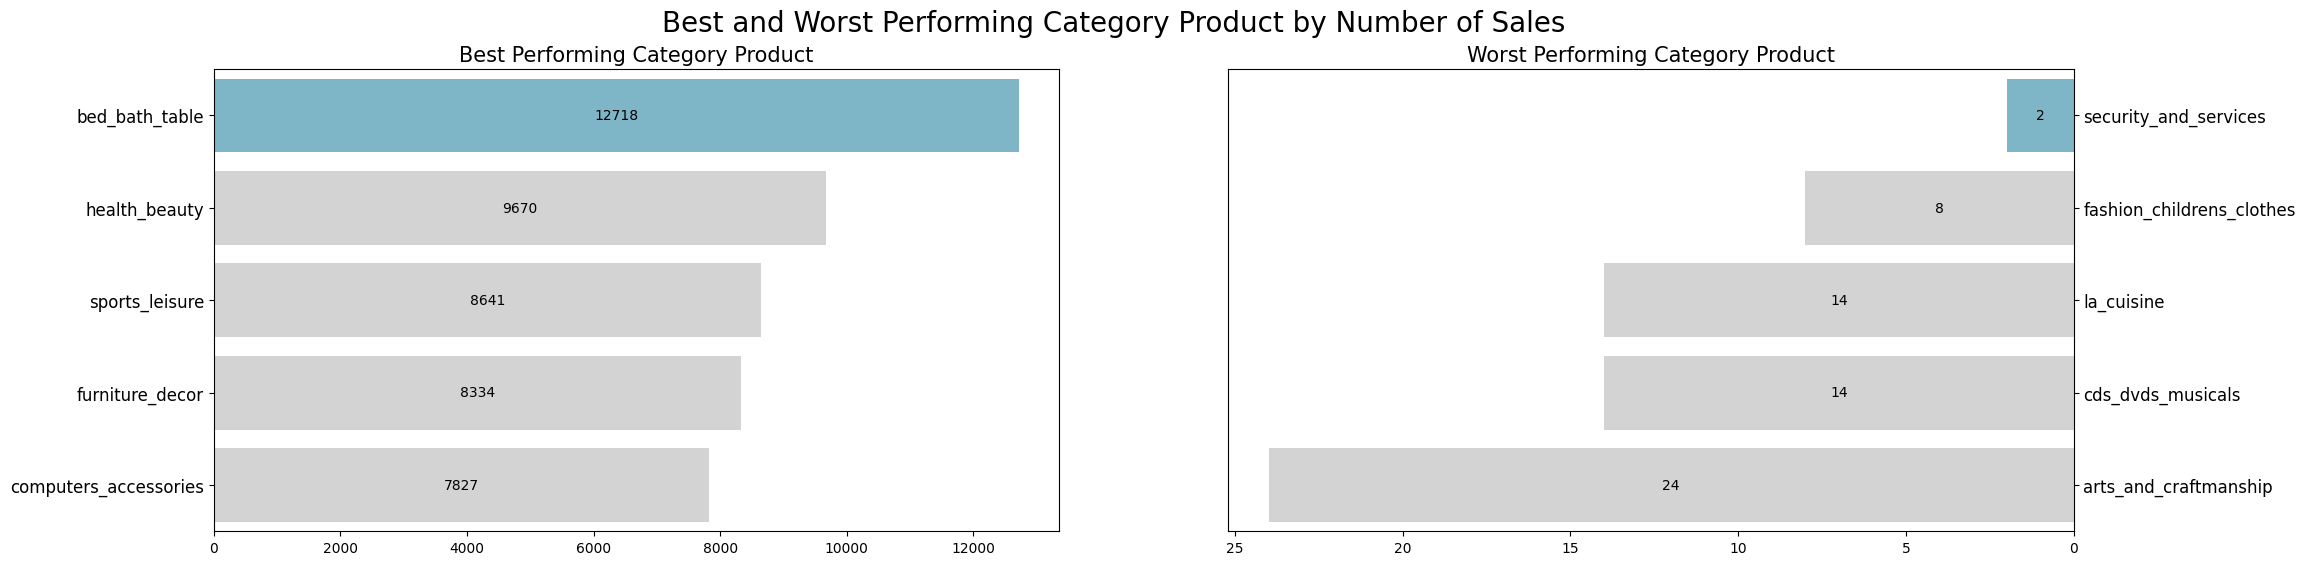

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="orders", y="category", data=df_category.sort_values(by="orders", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Category Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
ax[0].bar_label(ax[0].containers[0], label_type='center')



sns.barplot(x="orders", y="category", data=df_category.sort_values(by="orders", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Category Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].bar_label(ax[1].containers[0], label_type='center')

plt.suptitle("Best and Worst Performing Category Product by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 2: Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

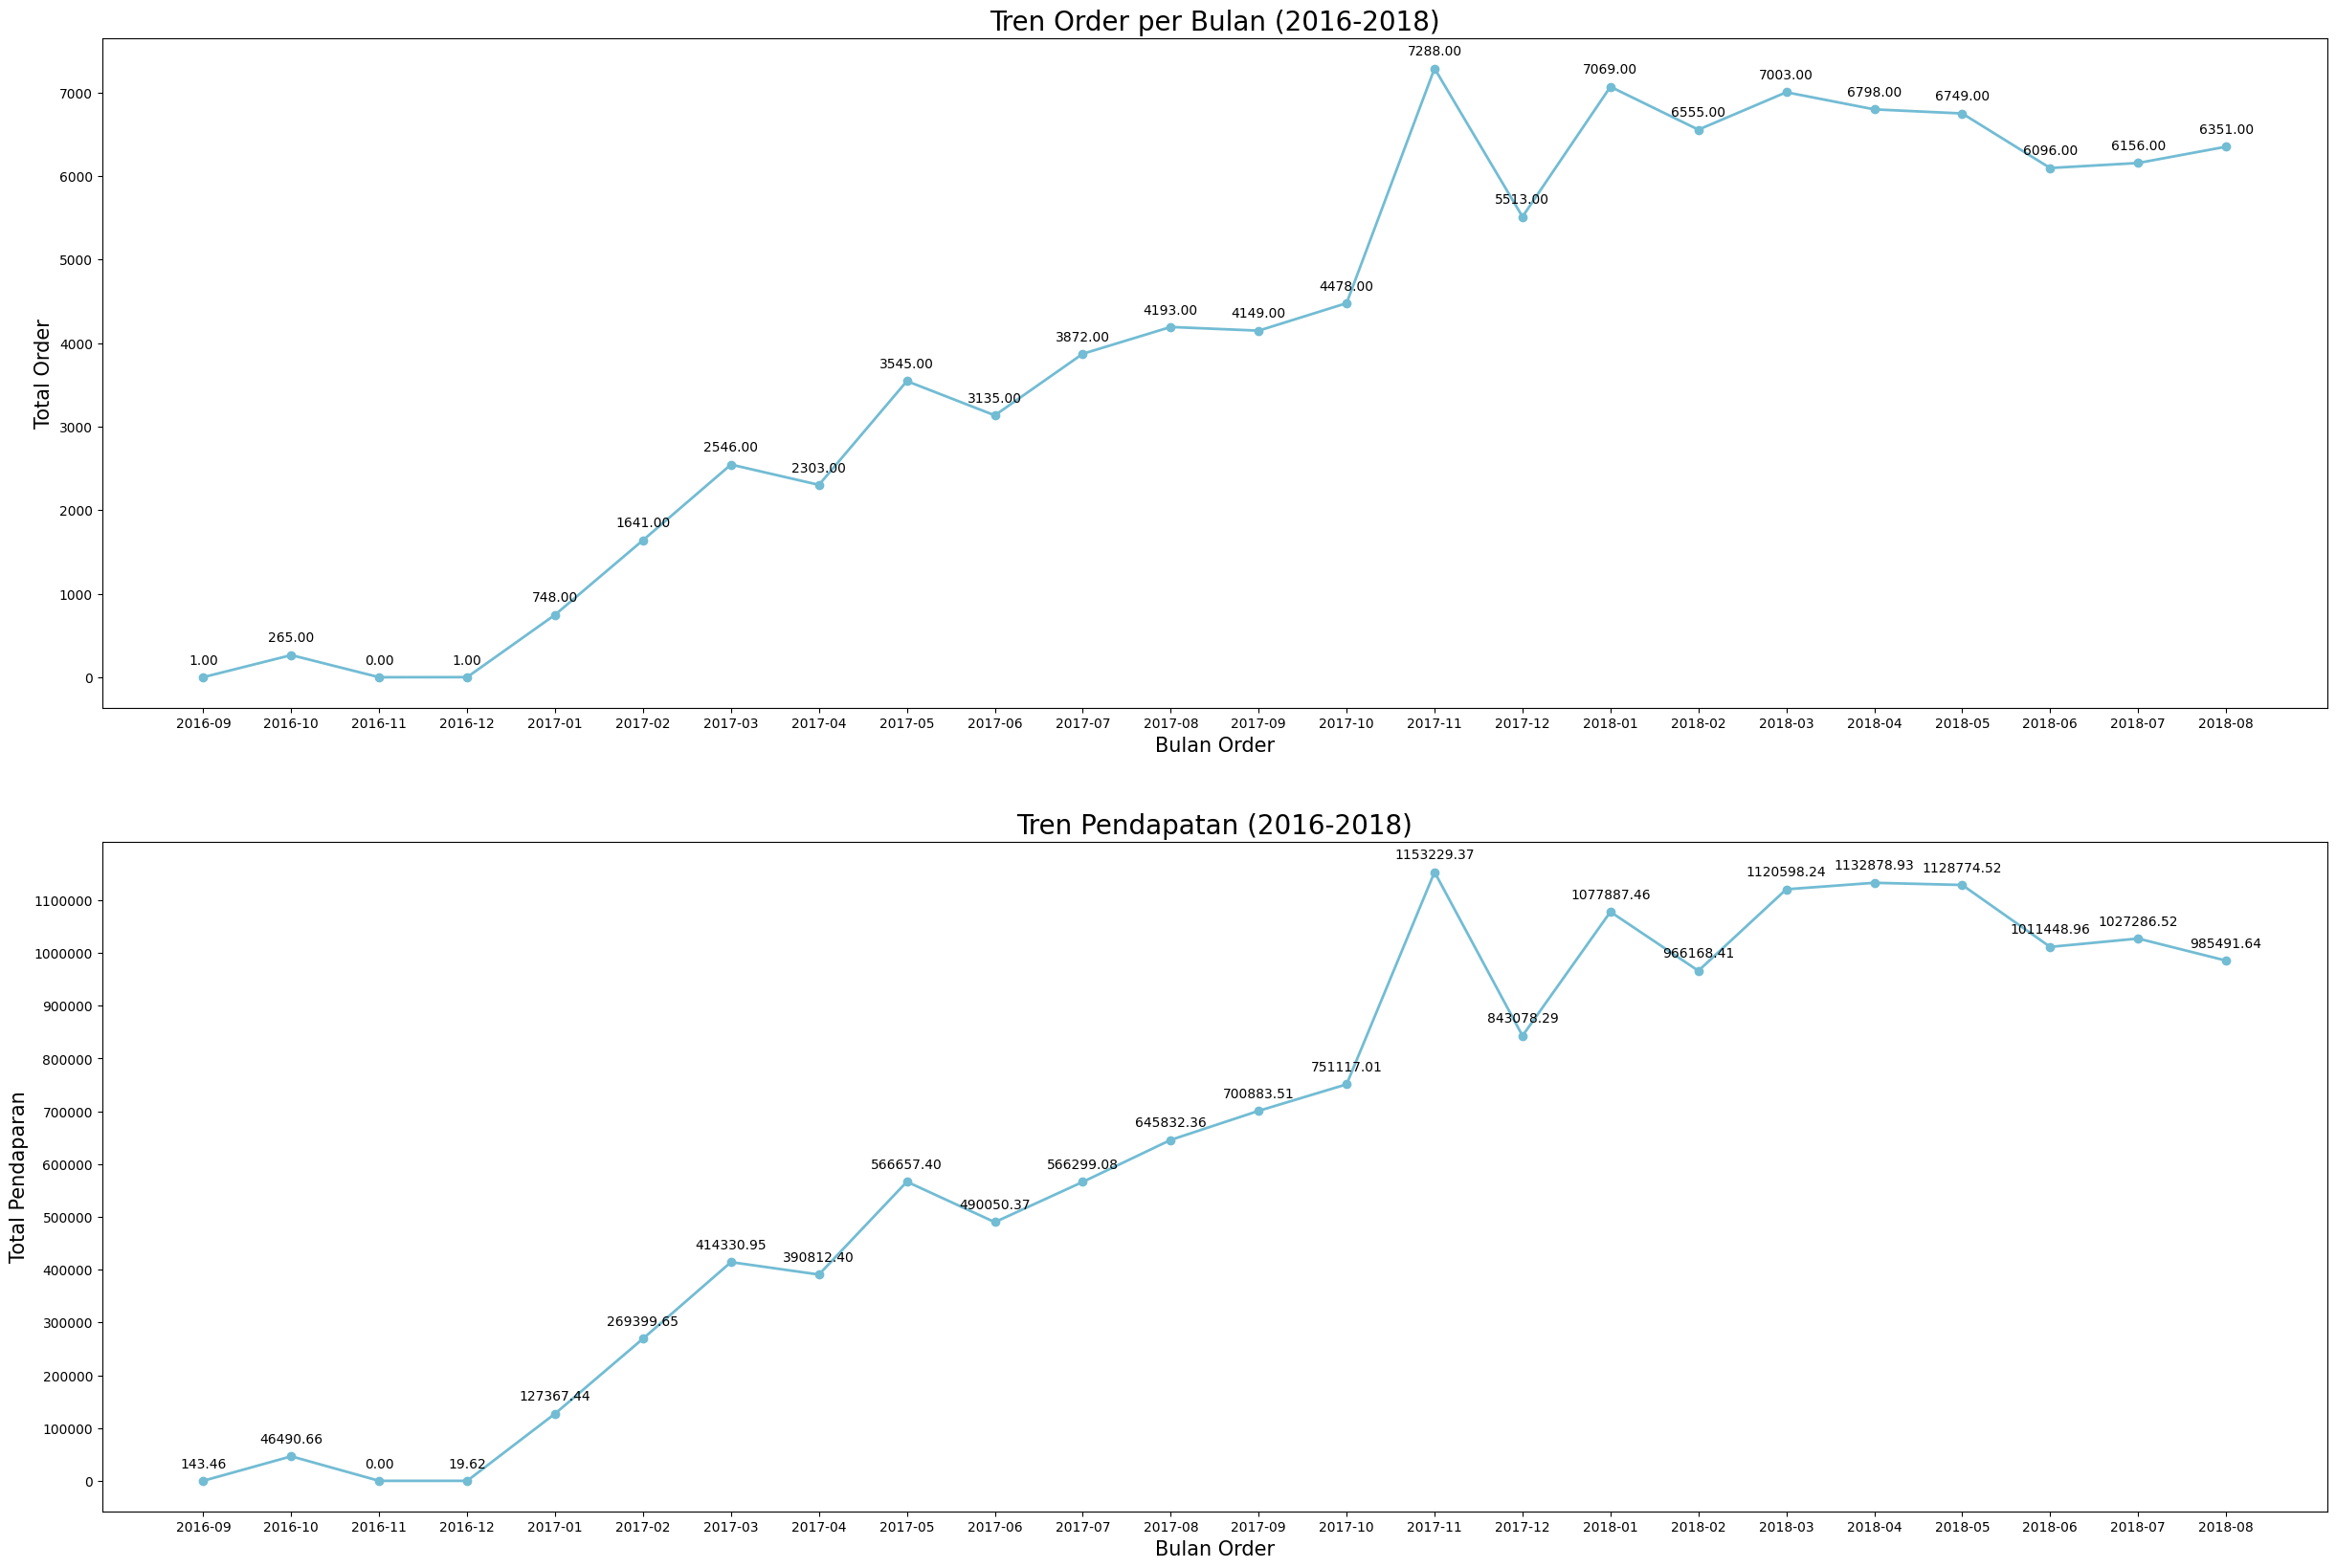

In [40]:
values = np.arange(0,1200000,100000)
# Creating the figure and subplots
# according the argument passed

fig, axes = plt.subplots(2, 1, figsize=(30, 20))
# plotting the data in the
# 1st subplot
axes[0].plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)


# axes[0].set_xticks(fontsize=10, rotation=45)
# axes[0].set_yticks(fontsize=10)
axes[0].set_title("Tren Order per Bulan (2016-2018)", loc="center", fontsize=20)
axes[0].set_xlabel('Bulan Order',size=15)
axes[0].set_ylabel('Total Order',size=15)
# plt.ylabel('Total Order',size=15)
for x,y in zip(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"]):

    label = "{:.2f}".format(y)

    axes[0].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center)





# plotting the data in the 2nd
# subplot only
axes[1].plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)

axes[1].set_xlabel('Bulan Order',size=15)
axes[1].set_ylabel('Total Pendaparan',size=15)
axes[1].set_title("Tren Pendapatan (2016-2018)", loc="center", fontsize=20)
# plt.xticks(fontsize=10, rotation=45)
axes[1].set_yticks(values, ['%d' % val for val in values]) # membuat values (data y) jadi list y xticks
# zip joins x and y coordinates in pairs
for x,y in zip(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["revenue"]):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


referensi:
- https://www.programiz.com/python-programming/datetime/strftime
- https://matplotlib.org/stable/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py
- https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
- https://www.geeksforgeeks.org/how-to-adjust-number-of-ticks-in-seaborn-plots/
- [Mengubah Ukuran Figure](https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots)

### Geolocation

===========================

In [41]:
# Menhapus awaln 0 pada geolocation_zip_code_prefix
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(int)
geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000121 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000121 non-null  int64  
 1   geolocation_lat              1000121 non-null  float64
 2   geolocation_lng              1000121 non-null  float64
 3   geolocation_city             1000121 non-null  object 
 4   geolocation_state            1000121 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 45.8+ MB


In [42]:
df_orders_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 96454
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
 8   customer_unique_id             96455 non-null  object        
 9   customer_zip_code_prefix       96455 non-null  int64         
 10  customer_city                  96455 non-null  object        
 11  customer_state 

In [43]:
Geospatial = pd.merge(
    left = geo,
    right = df_orders_customers,
    how = 'right',
    left_on = 'geolocation_zip_code_prefix',
    right_on = 'customer_zip_code_prefix'
)

Geospatial

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3149.0,-23.574809,-46.587471,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,3149.0,-23.578333,-46.587123,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,3149.0,-23.574809,-46.587471,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,3149.0,-23.575033,-46.587451,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
4,3149.0,-23.580054,-46.586673,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650497,83750.0,-25.762064,-49.720313,lapa,PR,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR
14650498,83750.0,-25.758551,-49.722177,lapa,PR,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR
14650499,83750.0,-25.757450,-49.713800,lapa,PR,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR
14650500,83750.0,-25.774218,-49.737533,lapa,PR,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR


In [44]:
# coba = geo[['geolocation_lat', 'geolocation_lng	']]
w= Geospatial[['geolocation_lat', 'geolocation_lng']].head(10)
coba = w.values.tolist()
coba

[[-23.57480921065843, -46.587471259651394],
 [-23.578333244308777, -46.587122588770185],
 [-23.57480921065843, -46.587471259651394],
 [-23.575033372468116, -46.58745087621902],
 [-23.580054000000004, -46.58667299999999],
 [-23.578333244308777, -46.587122588770185],
 [-23.57480921065843, -46.587471259651394],
 [-23.57628116493396, -46.58727586558455],
 [-23.573953588621183, -46.58733059880101],
 [-23.57962848542904, -46.58671366763807]]

-8.78773553376195, -57.22310066880168


Referensi:
- [Memasukan koordinat yang banyak](https://stackoverflow.com/questions/39401729/plot-latitude-longitude-points-from-dataframe-on-folium-map-ipython)
- [Convert DF to List](https://datatofish.com/convert-pandas-dataframe-to-list/)

In [45]:
from folium.features import CustomIcon
from folium.plugins import MarkerCluster
from folium import Circle, Marker

In [46]:
#  Menampilkan 5 data terlebih dahulu
yuk = Geospatial.head(5)
yuk

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3149.0,-23.574809,-46.587471,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,3149.0,-23.578333,-46.587123,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,3149.0,-23.574809,-46.587471,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,3149.0,-23.575033,-46.587451,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
4,3149.0,-23.580054,-46.586673,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP


In [47]:
#menampilkan 5 data terlebih dahulu
bubble = folium.Map(location =[-8.78773553376195, -57.22310066880168],
                       zoom_start =4,tiles ='cartodbpositron')

#Add Plugins
mc = MarkerCluster()
for idx, row in yuk.iterrows():
    mc.add_child(Marker([row['geolocation_lat'], row['geolocation_lng']]))
bubble.add_child(mc)

#Display Bubble Chart
bubble

In [48]:
# #create a basemap
# bubble = folium.Map(location =[-8.78773553376195, -57.22310066880168],
#                        zoom_start =3,tiles ='cartodbpositron')

# #Add Plugins
# mc = MarkerCluster()
# for idx, row in Geospatial.iterrows():
#     mc.add_child(Marker([row['geolocation_lat'], row['geolocation_lng']]))
# bubble.add_child(mc)

# #Display Bubble Chart
# bubble

===============================================================

Support for third party widgets will remain active for the duration of the session. To disable support:

## Conclusion

#### Kesimpulan 1 - Pertanyaan Kategori Produk yang paling laris dan tidak laris?

  A. 5 kategori Produk yang paling laris:

  1. Bed Bath Table
  2. Health Beauty
  3. Sports Leisure
  4. Furniture Decor
  5. Computers Accessories


  B. 5 kategori Produk yang kurang laris:

  1. Security and Services
  2. Fashion Childrens Clothes
  3. La Cuisine
  4. Cds DVDS Musicals
  5. Arts and Craftmanship

#### Kesimpulan pertanyaan 2 - Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?
dimana grafiknya hampir selalu **melonjak dan ada penaikan**. terutama pada **Bulan November tahun 2017 pendapatan dan penjualan paling banyak** yang didapatkan Olist Store


=========================================================================================
#### **RFM**
Analisis RFM digunakan untuk mengidentifikasi segmen customer yang berbeda berdasarkan perilaku pembelian mereka. Analisis RFM dilakukan berdasarkan parameter berikut

- **Recency (R)**: Berapa lama sejak pelanggan terakhir melakukan pembelian? Nilai recency yang **rendah** menunjukkan pelanggan tersebut **aktif melakukan pemesanan**.

- **Frequency (F)**: **Berapa kali pelanggan telah melakukan pembelian** dalam periode tertentu? Nilai frequency yang **tinggi** menunjukkan pelanggan tersebut **sering melakukan pemesanan**.

- **Monetary (M)**: Berapa **total uang yang dihabiskan** oleh pelanggan? Nilai monetary yang **tinggi** menunjukkan pelanggan tersebut **menghabiskan uang yang lebih** banyak dalam melakukan pemesanan.

In [158]:
df_all = pd.merge(
    left = df_otp,
    right = df_orders_customers,
    how = 'left',
    on = 'order_id'
)

df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 96454
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   order_id                         96455 non-null  object        
 1   customer_id_x                    96455 non-null  object        
 2   order_status_x                   96455 non-null  object        
 3   order_purchase_timestamp_x       96455 non-null  datetime64[ns]
 4   order_approved_at_x              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date_x  96455 non-null  datetime64[ns]
 8   order_item_id                    96455 non-null  int64         
 9   price                            96455 non-null  float64       
 10  freight_value                    96455 non-null  float64  

In [50]:
rfm_df = df_all.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp_y": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date =  df_all["order_purchase_timestamp_y"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114
2,0000f46a3911fa3c0805444483337064,1,86.22,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,321
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,288


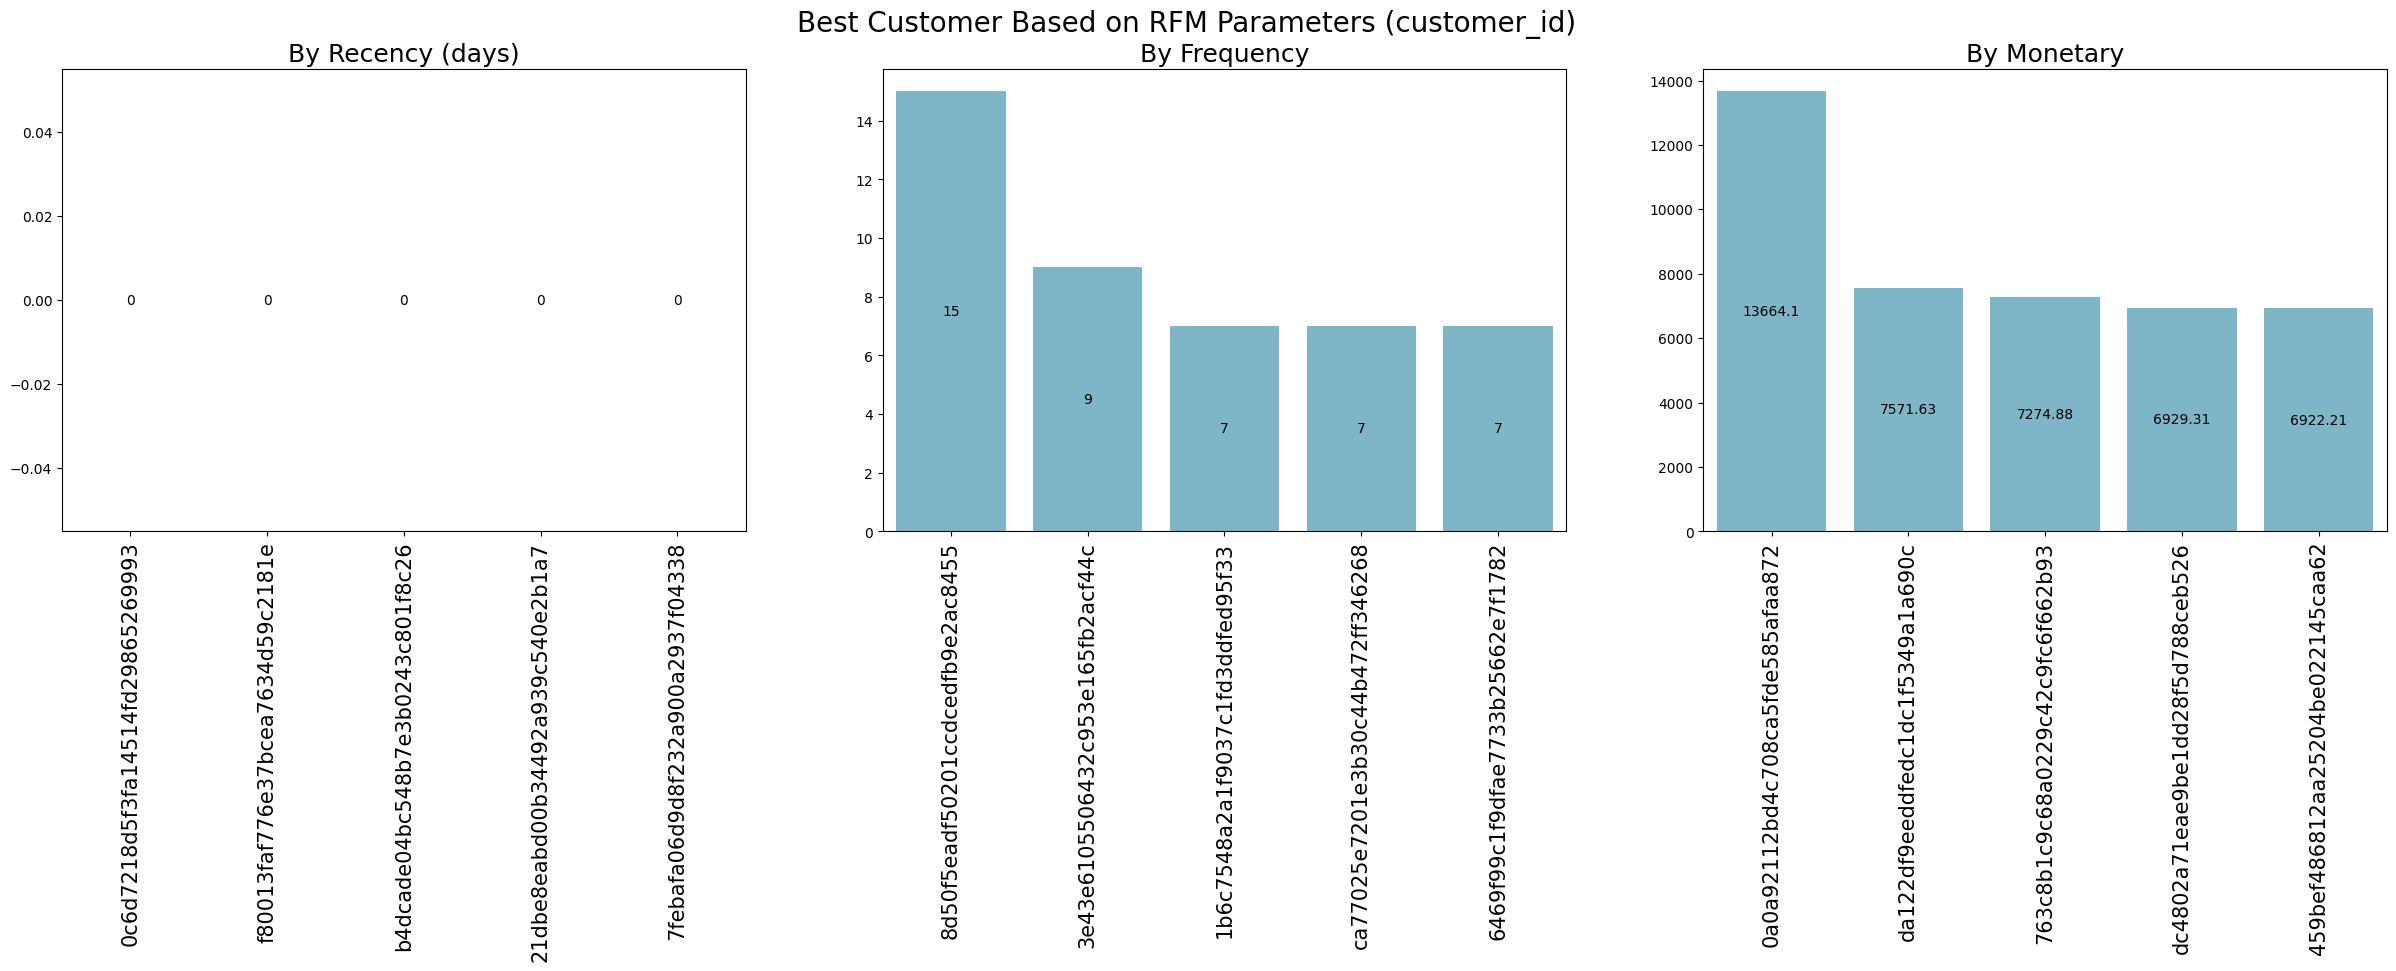

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation = 90)
ax[0].bar_label(ax[0].containers[0], label_type='center')


sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation = 90)
ax[1].bar_label(ax[1].containers[0], label_type='center')

sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation = 90)
ax[2].bar_label(ax[2].containers[0], label_type='center')

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

#Streamlit

In [52]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00


In [53]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.694s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [122]:
df_otp

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,price,freight_value,total_price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,159.90,19.22,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,45.00,27.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,19.90,8.72,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...
96450,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,72.00,13.08,85.08
96451,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,174.90,20.10,195.00
96452,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,205.99,65.02,271.01
96453,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,3,359.98,81.18,441.16


In [112]:
percobaan.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,price,freight_value,total_price,customer_city,customer_state,customer_unique_id,customer_zip_code_prefix
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,29.99,8.72,38.71,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,118.70,22.76,141.46,barreiras,BA,af07308b275d755c9edb36a90c618231,47813
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,159.90,19.22,179.12,vianopolis,GO,3a653a41f6f9fc3d2a113cf8398680e8,75265


In [123]:
df_poi.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop


In [183]:
%%writefile app.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency




sns.set(style='dark')

# Helper function yang dibutuhkan untuk menyiapkan berbagai dataframe

def create_daily_orders_df(df):
    daily_orders_df = df.resample(rule='M', on='order_purchase_timestamp').agg({
        "order_id": "nunique",
        "total_price": "sum"
    })
    daily_orders_df = daily_orders_df.reset_index()
    daily_orders_df.rename(columns={
        "order_id": "order_count",
        "total_price": "revenue"
    }, inplace=True)

    return daily_orders_df

def create_sum_order_items_df(df):
    #sum_order_items_df = df.groupby("product_category_name").product_id.sum().sort_values(ascending=False).reset_index()
    sum_order_items_df = df.groupby(by="product_category_name_english").count().reset_index() #jumlah pembelian
    sum_order_items_df = sum_order_items_df.rename(columns={"product_category_name_english": "category", "product_id": "quantity_x"})
    return sum_order_items_df

def create_rfm_df(df):
    rfm_df = df.groupby(by="customer_unique_id", as_index=False).agg({
        "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
        "order_id": "nunique",
        "total_price": "sum"
    })
    rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

    rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
    recent_date = df["order_purchase_timestamp"].dt.date.max()
    rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
    rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

    return rfm_df


# Load cleaned data
all_df = pd.read_csv("https://raw.githubusercontent.com/abdul987a/resource/main/all_data.csv")
poi_df = pd.read_csv("https://raw.githubusercontent.com/abdul987a/resource/main/poi_data.csv")


#st.dataframe(data=all_df)

datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
all_df.sort_values(by="order_purchase_timestamp", inplace=True)
all_df.reset_index(inplace=True)

for column in datetime_columns:
    all_df[column] = pd.to_datetime(all_df[column])

# Filter data
min_date = all_df["order_purchase_timestamp"].min()
max_date = all_df["order_purchase_timestamp"].max()


with st.sidebar:
    # Menambahkan logo perusahaan
    st.subheader("Olist Store")

    # Mengambil start_date & end_date dari date_input
    start_date, end_date = st.date_input(
        label='Rentang Waktu',min_value=min_date,
        max_value=max_date,
        value=[min_date, max_date]
    )

main_df = all_df[(all_df["order_purchase_timestamp"] >= str(start_date)) &
                (all_df["order_purchase_timestamp"] <= str(end_date))]



# # Menyiapkan berbagai dataframe
daily_orders_df = create_daily_orders_df(main_df)
sum_order_items_df = create_sum_order_items_df(poi_df)
rfm_df = create_rfm_df(main_df)
#st.dataframe(daily_orders_df)

# plot number of daily orders (2021)
st.header('Olist Store Dashboard :sparkles:')
st.subheader('Daily Orders')

col1, col2 = st.columns(2)

with col1:
    total_orders = daily_orders_df.order_count.sum()
    st.metric("Total orders", value=total_orders)

with col2:
    total_revenue = format_currency(daily_orders_df.revenue.sum(), "BRL ", locale='es_CO')
    st.metric("Total Revenue", value=total_revenue)


fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(
    daily_orders_df["order_purchase_timestamp"],
    daily_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)
for x,y in zip(daily_orders_df["order_purchase_timestamp"], daily_orders_df["order_count"]):

    label = "{:.2f}".format(y)

    ax.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center)

st.pyplot(fig)


# Product performance
st.subheader("Best & Worst Performing Product")

#st.dataframe(sum_order_items_df)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity_x", y="category", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Number of Sales", fontsize=30)
ax[0].set_title("Best Performing Product", loc="center", fontsize=50)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(x="quantity_x", y="category", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Number of Sales", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

st.pyplot(fig)


# Best Customer Based on RFM Parameters
st.subheader("Best Customer Based on RFM Parameters")

col1, col2, col3 = st.columns(3)

with col1:
    avg_recency = round(rfm_df.recency.mean(), 1)
    st.metric("Average Recency (days)", value=avg_recency)

with col2:
    avg_frequency = round(rfm_df.frequency.mean(), 2)
    st.metric("Average Frequency", value=avg_frequency)

with col3:
    avg_frequency = format_currency(rfm_df.monetary.mean(), "BRL ", locale='es_CO')
    st.metric("Average Monetary", value=avg_frequency)


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9"]

sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id", fontsize=30)
ax[0].set_title("By Recency (days)", loc="center", fontsize=50)
ax[0].tick_params(axis='y', labelsize=30)
ax[0].tick_params(axis='x', labelsize=20, rotation = 90)
ax[0].bar_label(ax[0].containers[0], label_type='center')

sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("customer_id", fontsize=30)
ax[1].set_title("By Frequency", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=30)
ax[1].tick_params(axis='x', labelsize=20, rotation = 90)
ax[1].bar_label(ax[1].containers[0], label_type='center')

sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel("customer_id", fontsize=30)
ax[2].set_title("By Monetary", loc="center", fontsize=50)
ax[2].tick_params(axis='y', labelsize=30)
ax[2].tick_params(axis='x', labelsize=20, rotation = 90)
ax[2].bar_label(ax[2].containers[0], label_type='center')

st.pyplot(fig)

st.caption('Copyright © Abdul Rohman 2023')

Overwriting app.py


In [56]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 35.192.60.201


In [184]:
!streamlit run /content/app.py &>/content/logs.txt & npx localtunnel --port 8501

npx: installed 22 in 2.587s
your url is: https://better-sites-cry.loca.lt
^C
